<a href="https://colab.research.google.com/github/Ruthranayaki213/Airpollution_predection/blob/main/AirPollution_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv('/content/station_day.csv')

In [2]:
import matplotlib
import matplotlib .pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
dataset.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


<Axes: >

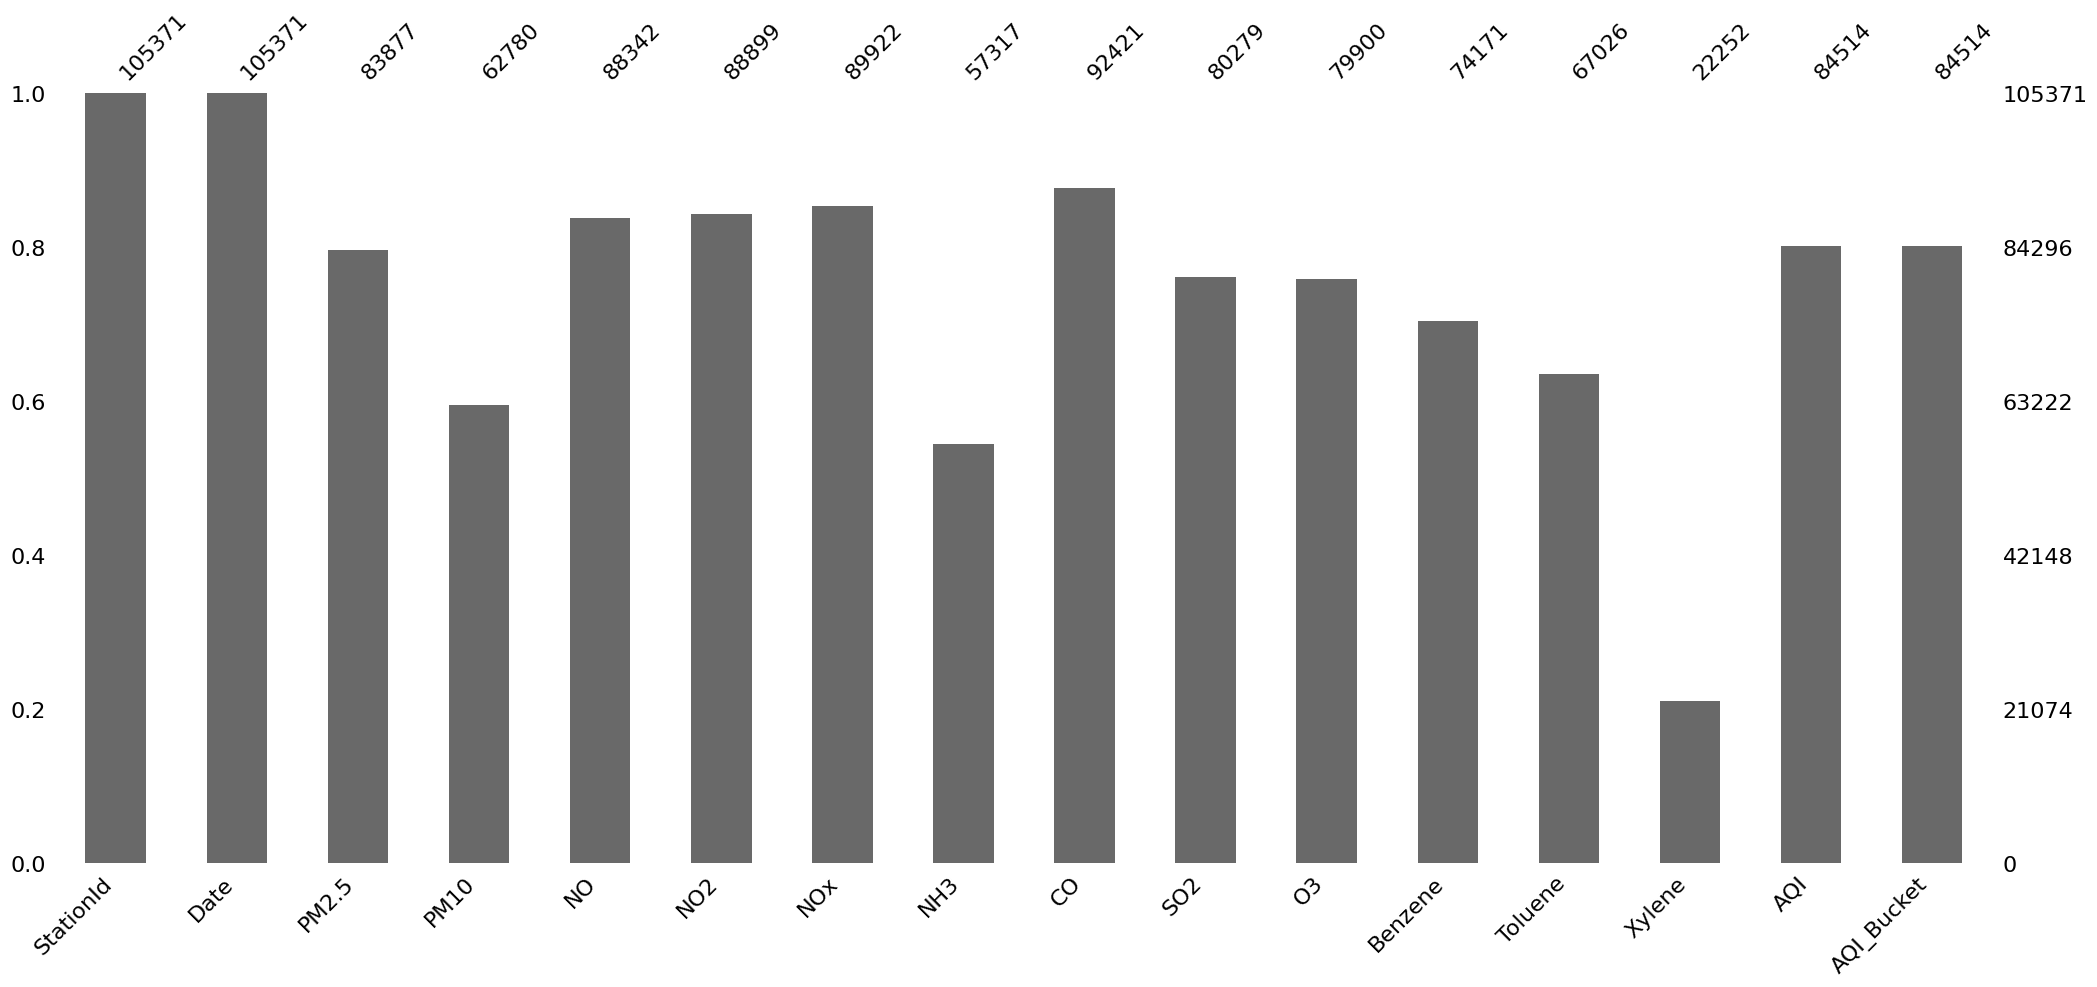

In [4]:
msno.bar(dataset)

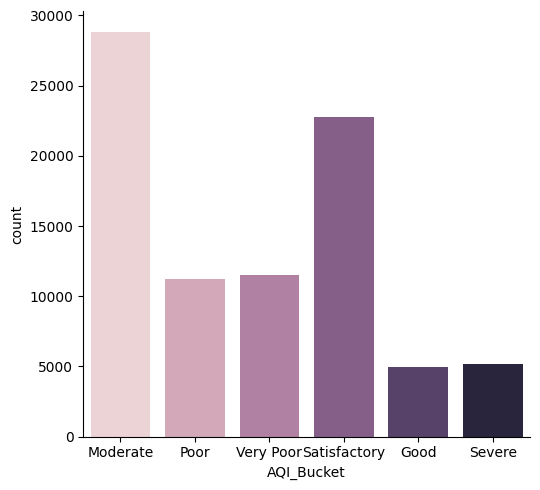

In [5]:
sns.catplot(x = "AQI_Bucket", kind= "count", palette = "ch: 2.87", height=5, aspect=1.1, data = dataset)

In [6]:
dataset = dataset.dropna(subset=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI","AQI_Bucket"])

In [7]:
X = dataset.drop(['AQI_Bucket','StationId','Date'], axis=1)


In [8]:
dataset.AQI_Bucket

1             Moderate
2             Moderate
3             Moderate
4             Moderate
5             Moderate
              ...     
105365        Moderate
105366        Moderate
105367    Satisfactory
105368        Moderate
105369        Moderate
Name: AQI_Bucket, Length: 9679, dtype: object

In [9]:
dataset['AQI_Bucket'].value_counts()

Moderate        4234
Satisfactory    3533
Good             931
Poor             518
Very Poor        363
Severe           100
Name: AQI_Bucket, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
class_labels = dataset.AQI_Bucket
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
continuous_labels = label_encoder.transform(class_labels)
print(class_labels.unique())
print(continuous_labels)

['Moderate' 'Poor' 'Very Poor' 'Satisfactory' 'Good' 'Severe']
[1 1 1 ... 3 1 1]


In [11]:

y = continuous_labels

In [12]:
print(X)

        PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2      O3  \
1       81.40  124.50   1.44  20.50  12.08  10.72  0.12  15.24  127.09   
2       78.32  129.06   1.26  26.00  14.85  10.28  0.14  26.96  117.44   
3       88.76  135.32   6.60  30.85  21.77  12.91  0.11  33.59  111.81   
4       64.18  104.09   2.56  28.07  17.01  11.42  0.09  19.00  138.18   
5       72.47  114.84   5.23  23.20  16.59  12.25  0.16  10.55  109.74   
...       ...     ...    ...    ...    ...    ...   ...    ...     ...   
105365  68.66  105.31   9.60  37.17  46.79  33.74  0.74  15.32   24.70   
105366  33.83   69.32   9.17  29.77  38.95  45.52  0.51  16.97   24.54   
105367  39.14   65.84   9.57  28.82  38.39  42.57  0.62  12.57   34.38   
105368  52.69   90.26   9.31  27.90  37.22  32.07  0.60  13.75   62.38   
105369  47.68   98.97  10.21  32.85  43.09  32.00  0.60  12.45   65.52   

        Benzene  Toluene  Xylene    AQI  
1          0.20     6.50    0.06  184.0  
2          0.22     7.95   

In [13]:
print(y)

[1 1 1 ... 3 1 1]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [15]:
from sklearn.preprocessing import StandardScaler
xt = StandardScaler().fit_transform(X)

SVM


In [16]:

clf = SVC(kernel='linear')
clf.kernel

'linear'

In [17]:

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:',accuracy)

Accuracy: 0.9972451790633609


In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)



MEAN SQUARED ERROR = 0.0027548209366391185
MEAN ABSOLUTE ERROR = 0.0027548209366391185
PRECISION = 0.9973409327965538
RECALL VALUE =  0.9972451790633609
F1 SCORE = 0.9972631468024366


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 282    0    0    0    0    0]
 [   0 1277    7    0    0    0]
 [   0    0  176    0    0    0]
 [   0    0    0 1038    0    0]
 [   0    0    0    0   27    1]
 [   0    0    0    0    0   96]]


DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=48)

In [23]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
acc = clf.score(X_test,y_test)
print('Accuracy:',accuracy)
print(acc)


Accuracy: 0.8003615702479339
0.8003615702479339


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)

MEAN SQUARED ERROR = 1.6306818181818181
MEAN ABSOLUTE ERROR = 0.5289256198347108
PRECISION = 0.640658442417693
RECALL VALUE =  0.8003615702479339
F1 SCORE = 0.7116384746712472


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0    0    0  376    0    0]
 [   0 1678    0    0    0    0]
 [   0  209    0    0    0    0]
 [   0    0    0 1421    0    0]
 [   0   41    0    0    0    0]
 [   0  147    0    0    0    0]]


RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9987086776859504


In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)

MEAN SQUARED ERROR = 0.0074896694214876035
MEAN ABSOLUTE ERROR = 0.002840909090909091
PRECISION = 0.9987245089947042
RECALL VALUE =  0.9987086776859504
F1 SCORE = 0.9986974817880098


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 375    0    0    1    0    0]
 [   0 1678    0    0    0    0]
 [   0    0  208    0    0    1]
 [   0    0    0 1421    0    0]
 [   0    1    0    0   38    2]
 [   0    0    0    0    0  147]]


KNN


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:',accuracy)

Accuracy: 0.9359504132231405


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)

MEAN SQUARED ERROR = 0.3434917355371901
MEAN ABSOLUTE ERROR = 0.1415289256198347
PRECISION = 0.935736284756872
RECALL VALUE =  0.9359504132231405
F1 SCORE = 0.9357613318470661


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 334    0    0   42    0    0]
 [   0 1616    7   55    0    0]
 [   0   20  180    0    0    9]
 [  30   63    0 1328    0    0]
 [   0    0    0    0   35    6]
 [   0    0   10    0    6  131]]


In [34]:
test_data = [80.65,120.88,6.60,44.9,11,13.98,0.88,20,111.11,0.45,3.98,0.22,200]

In [35]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
prediction = svm.predict([test_data])
print("predicted value = ",prediction[0])

predicted value =  1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [36]:
label_map = {
    0: 'Moderate',
    1: 'poor',
    2: 'very poor',
    3: 'satisfactory',
    4: 'good',
    5: 'severe'
}



from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
prediction = svm.predict([test_data])
print("predicted value = ",prediction[0])

# Convert the integer labels to string labels using the label map
y_pred_strings = [label_map[label] for label in prediction]

# Print the predicted labels as string labels
print("Predicted labels:", y_pred_strings)


predicted value =  1
Predicted labels: ['poor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
XGBOOST


In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)


model = xgb.XGBClassifier(objective='multi:softmax', num_class=6)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 265    0    0    0    0    0]
 [   0 1247    0    0    0    0]
 [   0    0  146    0    0    0]
 [   0    0    0 1104    0    0]
 [   0    0    0    0   32    0]
 [   0    0    0    0    0  110]]


In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)

MEAN SQUARED ERROR = 0.0
MEAN ABSOLUTE ERROR = 0.0
PRECISION = 1.0
RECALL VALUE =  1.0
F1 SCORE = 1.0


NAIVEE BAYES

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 46.59%


In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR =",mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =",mae)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("PRECISION =",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')
print("RECALL VALUE = ",recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 SCORE =",f1)

MEAN SQUARED ERROR = 2.6556473829201104
MEAN ABSOLUTE ERROR = 1.100550964187328
PRECISION = 0.5191262396230283
RECALL VALUE =  0.4659090909090909
F1 SCORE = 0.48124229419332865


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[137  26   3 122   0   0]
 [ 66 616 243 260   6  61]
 [  0  27  67   9   4  50]
 [217 333  52 454   0  16]
 [  0   0   1   0  26  10]
 [  0   5  20   0  20  53]]


VOTING CLASSIFIER

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
model_rf = RandomForestClassifier()


# Create the voting ensemble classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', model_rf),
    # ('gb', model_gb),
    # ('svm', model_svm)
], voting='hard')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.69%


STACKING

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_svm = SVC(probability=True)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

pred_rf = model_rf.predict(X_train)
pred_gb = model_gb.predict(X_train)
pred_svm = model_svm.predict(X_train)

stacking_train = np.column_stack((pred_rf, pred_gb, pred_svm))

meta_model = LogisticRegression()
meta_model.fit(stacking_train, y_train)


pred_rf_test = model_rf.predict(X_test)
pred_gb_test = model_gb.predict(X_test)
pred_svm_test = model_svm.predict(X_test)

stacking_test = np.column_stack((pred_rf_test, pred_gb_test, pred_svm_test))

meta_pred = meta_model.predict(stacking_test)

accuracy = accuracy_score(y_test, meta_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 99.74%


RESAMPLING TECHNIQUES

In [46]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       827
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00       729
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        66

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936



In [47]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

100.0


In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns_for_clustering = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
features = dataset[columns_for_clustering]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

dataset['Cluster'] = cluster_labels

print(dataset['Cluster'].value_counts())



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    5687
0    3317
2     503
3     172
Name: Cluster, dtype: int64


<ipython-input-48-bacc0cbf44c6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = cluster_labels


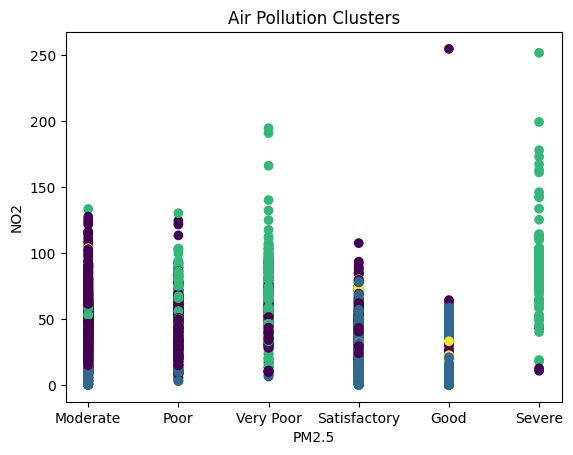

In [49]:
plt.scatter(dataset['AQI_Bucket'], dataset['NO2'], c=dataset['Cluster'], cmap='viridis')
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Air Pollution Clusters')
plt.show()
